In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as smf

## `Importing Data`

In [2]:
data= pd.read_csv("Airlines_data.csv")
data.head().T

,0,1,2,3,4
Month,Jan-95,Feb-95,Mar-95,Apr-95,May-95
Passengers,112,118,132,129,121


## `Describe Data`

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


## `Line Chart`

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

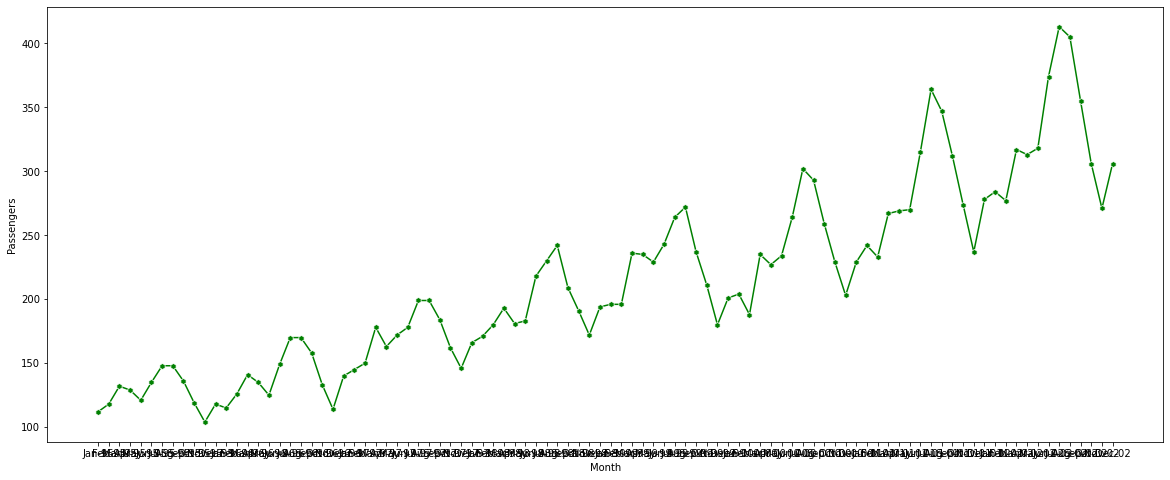

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x = "Month",y = "Passengers", data = data, color = "green", marker = "h")

## `Seasonal Line Chart`

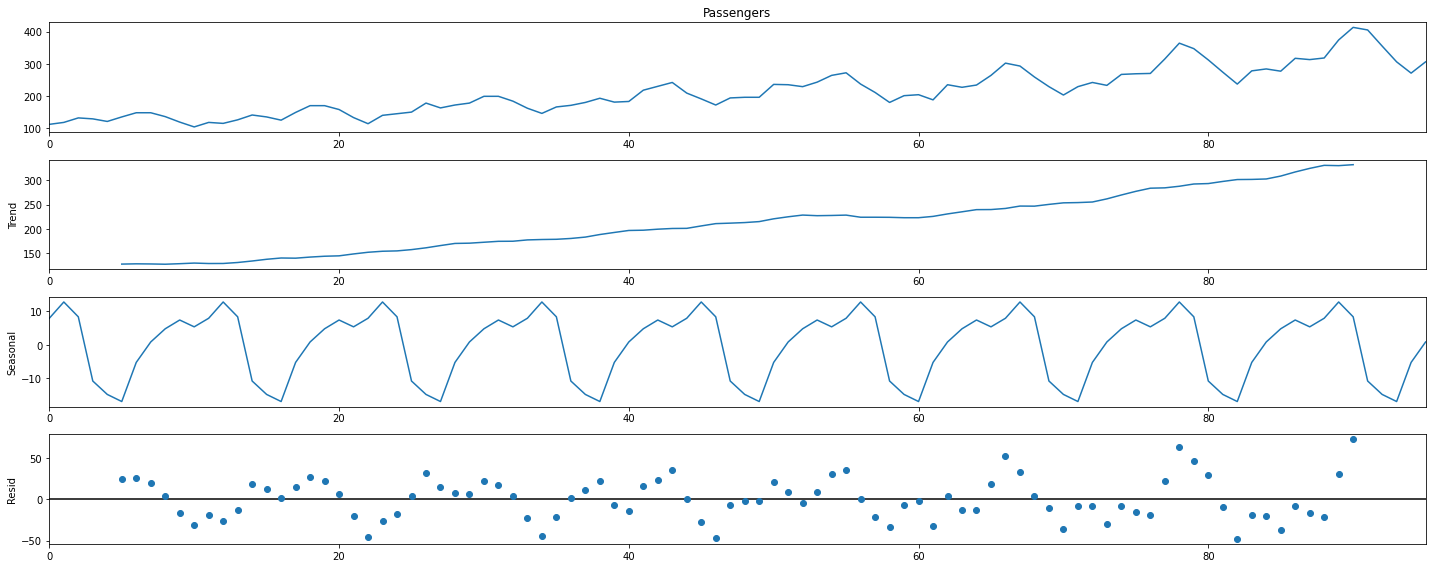

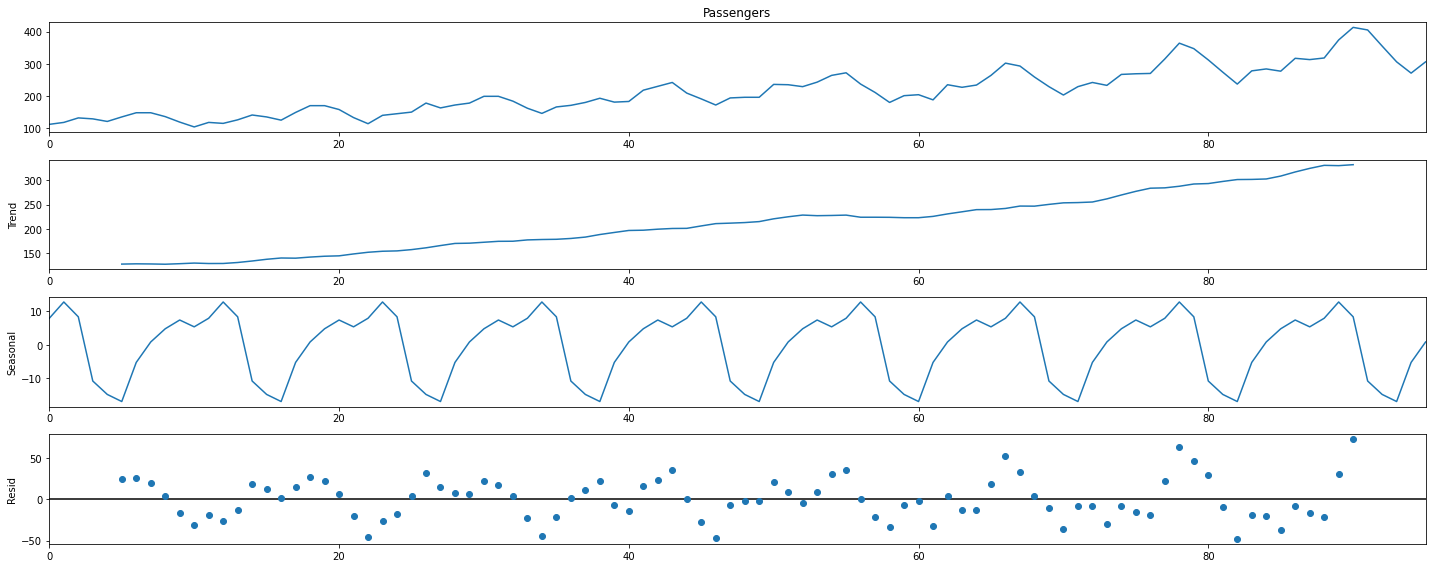

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,8)
seasonal_ts_add=smf.tsa.seasonal_decompose(data["Passengers"],freq=11)
seasonal_ts_add.plot()

## `Converting Month Name in full Format `

In [6]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["Month"] = data.Date.dt.strftime("%B")
data["year"] = data.Date.dt.strftime("%Y") 
data.iloc[:,0:4]

,Month,Passengers,Date,year
0,January,112,1995-01-01,1995
1,February,118,1995-02-01,1995
2,March,132,1995-03-01,1995
3,April,129,1995-04-01,1995
4,May,121,1995-05-01,1995
...,...,...,...,...
91,August,405,2002-08-01,2002
92,September,355,2002-09-01,2002
93,October,306,2002-10-01,2002
94,November,271,2002-11-01,2002


## `Boxplot`

<AxesSubplot:>

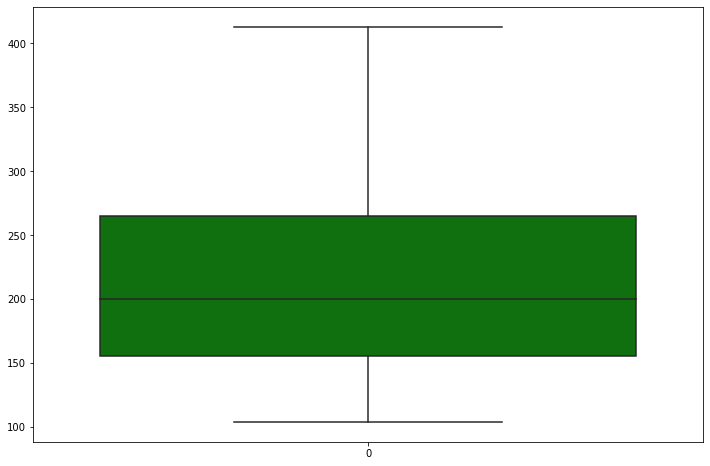

In [7]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(data=data['Passengers'],color='green')

## `Creating Dummies for Month`

In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(data['Month']))
df1 = pd.concat([data,month_dummies],axis = 1)
df1.head()

,Month,Passengers,Date,year,April,August,December,February,January,July,June,March,May,November,October,September
0,January,112,1995-01-01,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,February,118,1995-02-01,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,March,132,1995-03-01,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,April,129,1995-04-01,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995-05-01,1995,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Month', ylabel='year'>

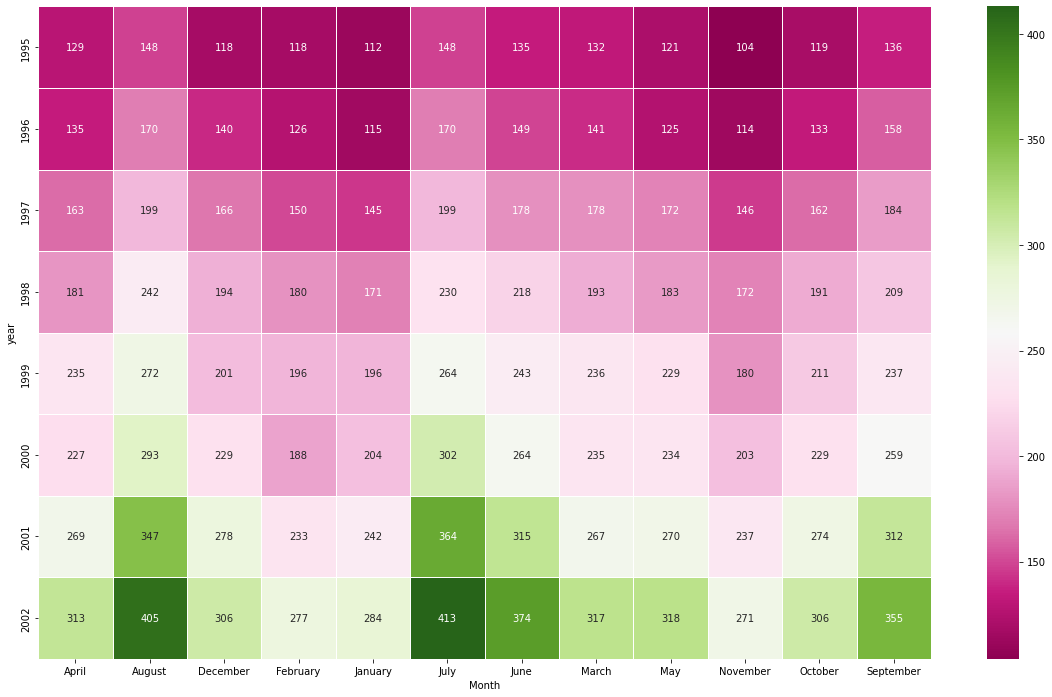

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",
                                 columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g",cmap="PiYG", linewidths=.5)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

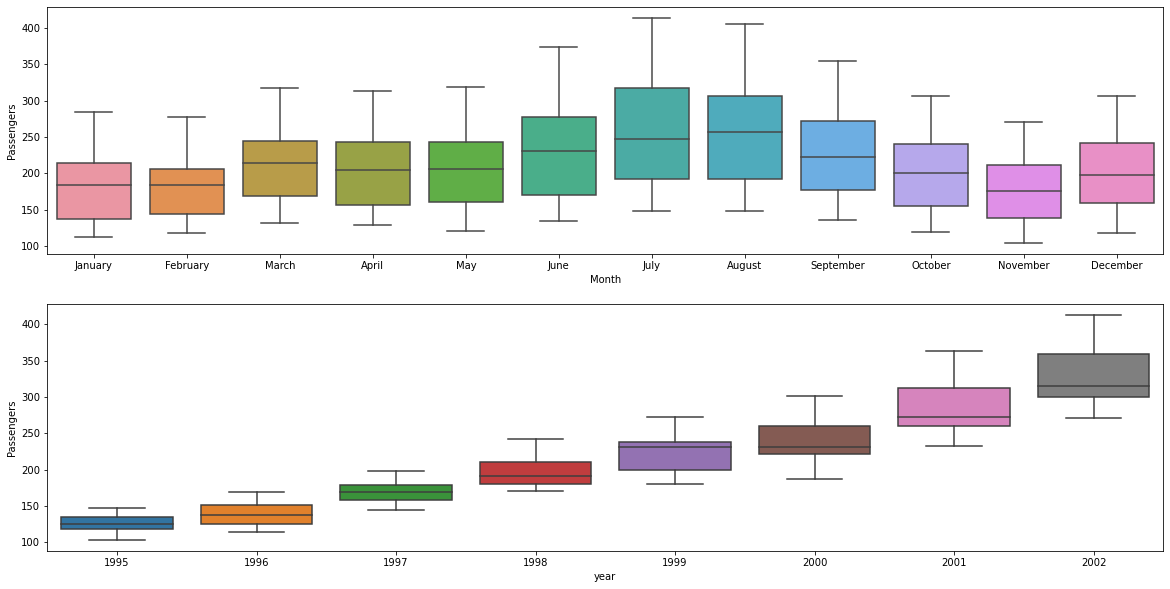

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

In [11]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"]*df1["t"]
df1["log_Passengers"] = np.log(df1["Passengers"])
df1.columns
df1.head(10)

,Month,Passengers,Date,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
0,January,112,1995-01-01,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,February,118,1995-02-01,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,March,132,1995-03-01,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,April,129,1995-04-01,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,121,1995-05-01,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
5,June,135,1995-06-01,1995,0,0,0,0,0,0,1,0,0,0,0,0,6,36,4.905275
6,July,148,1995-07-01,1995,0,0,0,0,0,1,0,0,0,0,0,0,7,49,4.997212
7,August,148,1995-08-01,1995,0,1,0,0,0,0,0,0,0,0,0,0,8,64,4.997212
8,September,136,1995-09-01,1995,0,0,0,0,0,0,0,0,0,0,0,1,9,81,4.912655
9,October,119,1995-10-01,1995,0,0,0,0,0,0,0,0,0,0,1,0,10,100,4.779123


In [12]:
Train = df1.head(75)
Test = df1.tail(25)

## `Linear Model`

In [13]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.838097495845


## `Exponential`

In [14]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.775259750197826


## `Quadratic`

In [15]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  54.03140645625284


## `Additive seasonality `

In [16]:
add_sea = smf.ols('Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  123.02763788084239


## `Additive Seasonality Quadratic`

In [17]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive seasonality Quadratic: ",rmse_add_sea_quad)

RMSE Additive seasonality Quadratic:  36.53627444546985


## `Multiplicative Seasonality`

In [18]:
mul_sea = smf.ols('log_Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_mult_sea = pd.Series(mul_sea.predict(Test))
rmse_mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
print("RMSE Multiplicative seasonality: ",rmse_mult_sea)

RMSE Multiplicative seasonality:  128.16622817596127


## `Additive Multiplicative Seasonality`

In [19]:
mul_add_sea = smf.ols('log_Passengers~t+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
print("RMSE Multiplicative seasonality: ",rmse_mult_add_sea)

RMSE Multiplicative seasonality:  11.565825437686495


## `List of All RMSE Values`

In [20]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_mult_sea,128.166228
6,rmse_mult_add_sea,11.565825


## `Date & Months`

In [21]:
data = [['2003-01-01', 'January'], ['2003-02-01', 'February'], ['2003-03-01', 'March'],['2003-04-01', 'April'],['2003-5-01', 'May'],['2003-06-01', 'June'],
        ['2003-07-01', 'July'],['2003-08-01', 'August'],['2003-09-01', 'September'],['2003-10-01', 'October'],['2003-11-01', 'November'],['2003-12-01', 'December']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,January
1,2003-02-01,February
2,2003-03-01,March
3,2003-04-01,April
4,2003-5-01,May
5,2003-06-01,June
6,2003-07-01,July
7,2003-08-01,August
8,2003-09-01,September
9,2003-10-01,October


## `Create dummies and T and T-Squared columns`

In [22]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date    Months  April  August  December  February  January  July  \
0  2003-01-01   January      0       0         0         0        1     0   
1  2003-02-01  February      0       0         0         1        0     0   
2  2003-03-01     March      0       0         0         0        0     0   
3  2003-04-01     April      1       0         0         0        0     0   
4   2003-5-01       May      0       0         0         0        0     0   

   June  March  May  November  October  September  t  t_squared  
0     0      0    0         0        0          0  1          1  
1     0      0    0         0        0          0  2          4  
2     0      1    0         0        0          0  3          9  
3     0      0    0         0        0          0  4         16  
4     0      0    1         0        0          0  5         25  


## `Forecasting using Multiplicative Additive Seasonality Model`

In [23]:
model_full = smf.ols('log_Passengers~t+January+February+March+April+May+June+July+August+September+October+November+December',data =df1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

## `Final Prediction for next 12 months`

In [24]:
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


<AxesSubplot:title={'center':'Forecasted Passengers'}, xlabel='Numbers', ylabel='Forecasted_Passengers'>

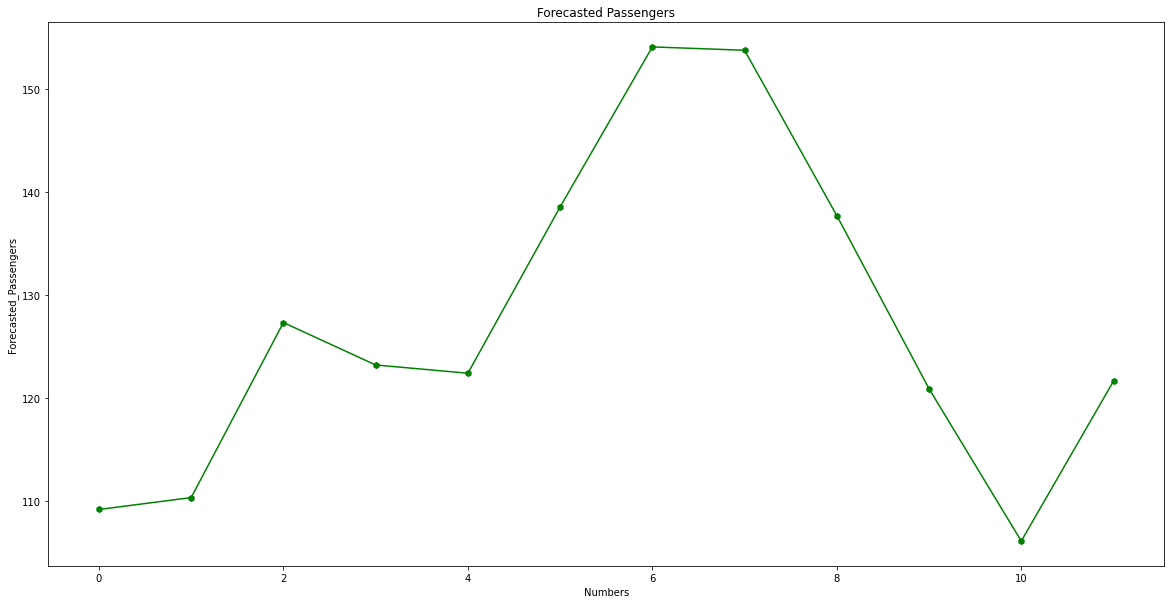

In [25]:
fig=plt.figure(figsize=(20,10))
plt.title('Forecasted Passengers')
plt.xlabel('Numbers')
plt.ylabel('Forecasted_Passengers')
Final_predict.Forecasted_Passengers.plot(color = "green", marker = "h")